In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#import the data
pd.set_option('display.max_rows',None)

data=pd.read_excel('C:\\Users\\marcella\\Documents\\Folds5x2_pp.xlsx',sheet_name='Sheet2')
values=pd.read_excel('C:\\Users\\marcella\\Documents\\values.xlsx')
data.info()
data.shape
data
data=data.rename(columns={'AT':'Temperature','V':'Exhaust Vacuum','PE':'Annual Electrical Energy','RH':'Relative Humidity',
                          'AP':'Ambient Pressure'})
data.info()
print(data.head())
#pe=annual electical energy
#identifying dependent and independent variable
y=data['Annual Electrical Energy'].values
print(y)
x=data.drop('Annual Electrical Energy',axis=1).values
print(x)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               9568 non-null   float64
 1   Exhaust Vacuum            9568 non-null   float64
 2   Ambient Pressure          9568 non-null   float64
 3   Relative Humidity         9568 non-null   float64
 4   Annual Electrical Energy  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
   Temperature  Exhaust Vacuum  Ambient Pressure  Relative H

In [9]:
#train and test using test size as 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape + x_test.shape
y_train.shape +y_test.shape


(6697, 2871)

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
# model.predict([[20,40,60,80]])
# model.predict([[9.59,38.56,1017.01,60.10]])   
mode=model.predict(x_test)#this is y prediction
print(mode)



[482.09851919 446.54691304 470.92849687 ... 465.31668357 443.43483512
 442.53957252]


Text(0.5, 1.0, 'The Relationship btn the Actual and Predicted Values of y')

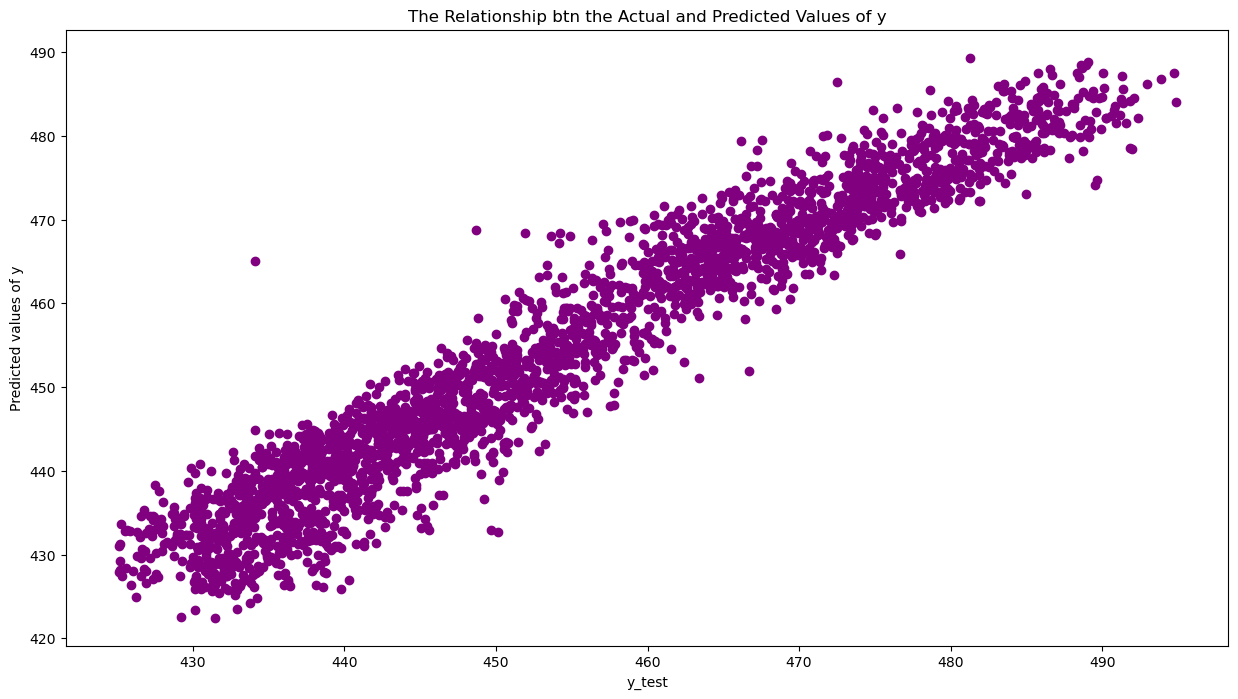

In [5]:
##mode accuracy by determining R^2
model.score(x_test,y_test)
#OR
from sklearn.metrics import r2_score
r2_score(y_test,mode)
from matplotlib import pyplot 
pyplot.figure(figsize=(15,8))
pyplot.scatter(y_test,mode,color='purple') #(actual,predicted)
pyplot.xlabel('y_test')
pyplot.ylabel('Predicted values of y')
pyplot.title('The Relationship btn the Actual and Predicted Values of y')



In [6]:
predicted_y=pd.DataFrame({'Actual_Value':y_test,'predicted_y':mode,'Difference':y_test - mode})
predicted_y.head(20)



,Actual_Value,predicted_y,Difference
0,492.39,482.098519,10.291481
1,444.31,446.546913,-2.236913
2,478.07,470.928497,7.141503
3,475.53,474.371832,1.158168
4,478.21,477.341979,0.868021
5,473.84,475.671096,-1.831096
6,437.11,441.840579,-4.730579
7,475.06,479.303105,-4.243105
8,460.56,465.089144,-4.529144
9,430.80,433.146810,-2.346810


In [7]:
values=pd.read_excel('C:\\Users\\marcella\\Documents\\values.xlsx')
values['Annual Electrical Energy']=model.predict(values.iloc[:,: ])



C:\Users\marcella\Documents\PYTHON1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [8]:
values=pd.read_excel('C:\\Users\\marcella\\Documents\\values.xlsx')
values['Annual Electrical Energy']=model.predict(values) 
values



C:\Users\marcella\Documents\PYTHON1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Annual Electrical Energy
0,30.1,40.1,50.1,60.1,379.661807
1,30.2,40.2,50.2,60.2,379.431770
2,30.3,40.3,50.3,60.3,379.201734
3,30.4,40.4,50.4,60.4,378.971698
